In [3]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import itertools
import re
# from ggplot import *
from scipy import stats
from scipy.stats import pearsonr

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [4]:
# !pip install pingouin --upgrade
# !pip install pandas --upgrade
# import pingouin as pg
from scipy.stats import pearsonr
from scipy.stats import norm


In [5]:
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
##Load csv file
##Freshest final latest last newest load loads

#After adding rs-fMRI clusters
nomom = pd.read_csv('NOMOM_ALL_data_python.csv', index_col=0, na_values=['NA'])

Con=nomom.loc[(nomom['Group'] == "Con")]
Con.name = 'Con'
NR=nomom.loc[(nomom['Group'] == "NR")]
NR.name = 'NR'




In [6]:
data=NR
selected_nomom = data[['Dam_s_Age_yrs_at_Subject_s_DOB', 
'X_Days_Single_Birth_to_PET_final','Days_with_mom_in_pair_Birth_to_PET','X_Days_Group_without_mom_Birth_to_PET_final','Year_1_pair']]
# #Correlations:
# selected_nomom.corr()
# print(selected_nomom.columns)
# pearsonr(selected_nomom['X_Days_Single_Birth_to_PET_final'], selected_nomom['Year_1_pair'])

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

# corr = df.corr(method=pearsonr_pval)
corr = selected_nomom.corr(method=pearsonr_pval)
print(corr)
# pearsonr(data['Dam_s_Age_yrs_at_Subject_s_DOB'], data['EN_STall_hip_trans'])
# print(result[1])

                                             Dam_s_Age_yrs_at_Subject_s_DOB  \
Dam_s_Age_yrs_at_Subject_s_DOB                                     1.000000   
X_Days_Single_Birth_to_PET_final                                   0.369056   
Days_with_mom_in_pair_Birth_to_PET                                 0.112747   
X_Days_Group_without_mom_Birth_to_PET_final                        0.187239   
Year_1_pair                                                        0.113357   

                                             X_Days_Single_Birth_to_PET_final  \
Dam_s_Age_yrs_at_Subject_s_DOB                                       0.369056   
X_Days_Single_Birth_to_PET_final                                     1.000000   
Days_with_mom_in_pair_Birth_to_PET                                   0.109749   
X_Days_Group_without_mom_Birth_to_PET_final                          0.290103   
Year_1_pair                                                          0.171268   

                                      

In [17]:
data=NR

tmp = data[[#'Dam_s_Age_yrs_at_Subject_s_DOB', 
#'X_Days_Single_Birth_to_PET_final','Days_with_mom_in_pair_Birth_to_PET','X_Days_Group_without_mom_Birth_to_PET_final','Year_1_pair','Year_2_pair','Total_Unique_Cagemates_Birth_to_PET_final',
#BEHAVIOR
'FF_NECall_pet_trans','FF_Aall_hip_trans', 'LO_NECall_pet_trans',
'LO_Aall_hip_trans'
]]

def pearsonr_pval(x,y):
    p = pearsonr(x,y)[1]
#     if p > .05:
#         p = np.nan
    return p


tmp_corr = tmp.corr(method='pearson')
tmp_2 = tmp_corr.rename(index=rename_index_dict, columns=rename_cols_dict)


tmp_2

,Freezing (NEC-PET),Freezing (Alone-HIP),LO_NECall_pet_trans,Locomotion (Alone-HIP)
Freezing (NEC-PET),1.000000,0.367160,-0.725916,-0.069537
Freezing (Alone-HIP),0.367160,1.000000,-0.232601,-0.173501
LO_NECall_pet_trans,-0.725916,-0.232601,1.000000,0.279597
Locomotion (Alone-HIP),-0.069537,-0.173501,0.279597,1.000000


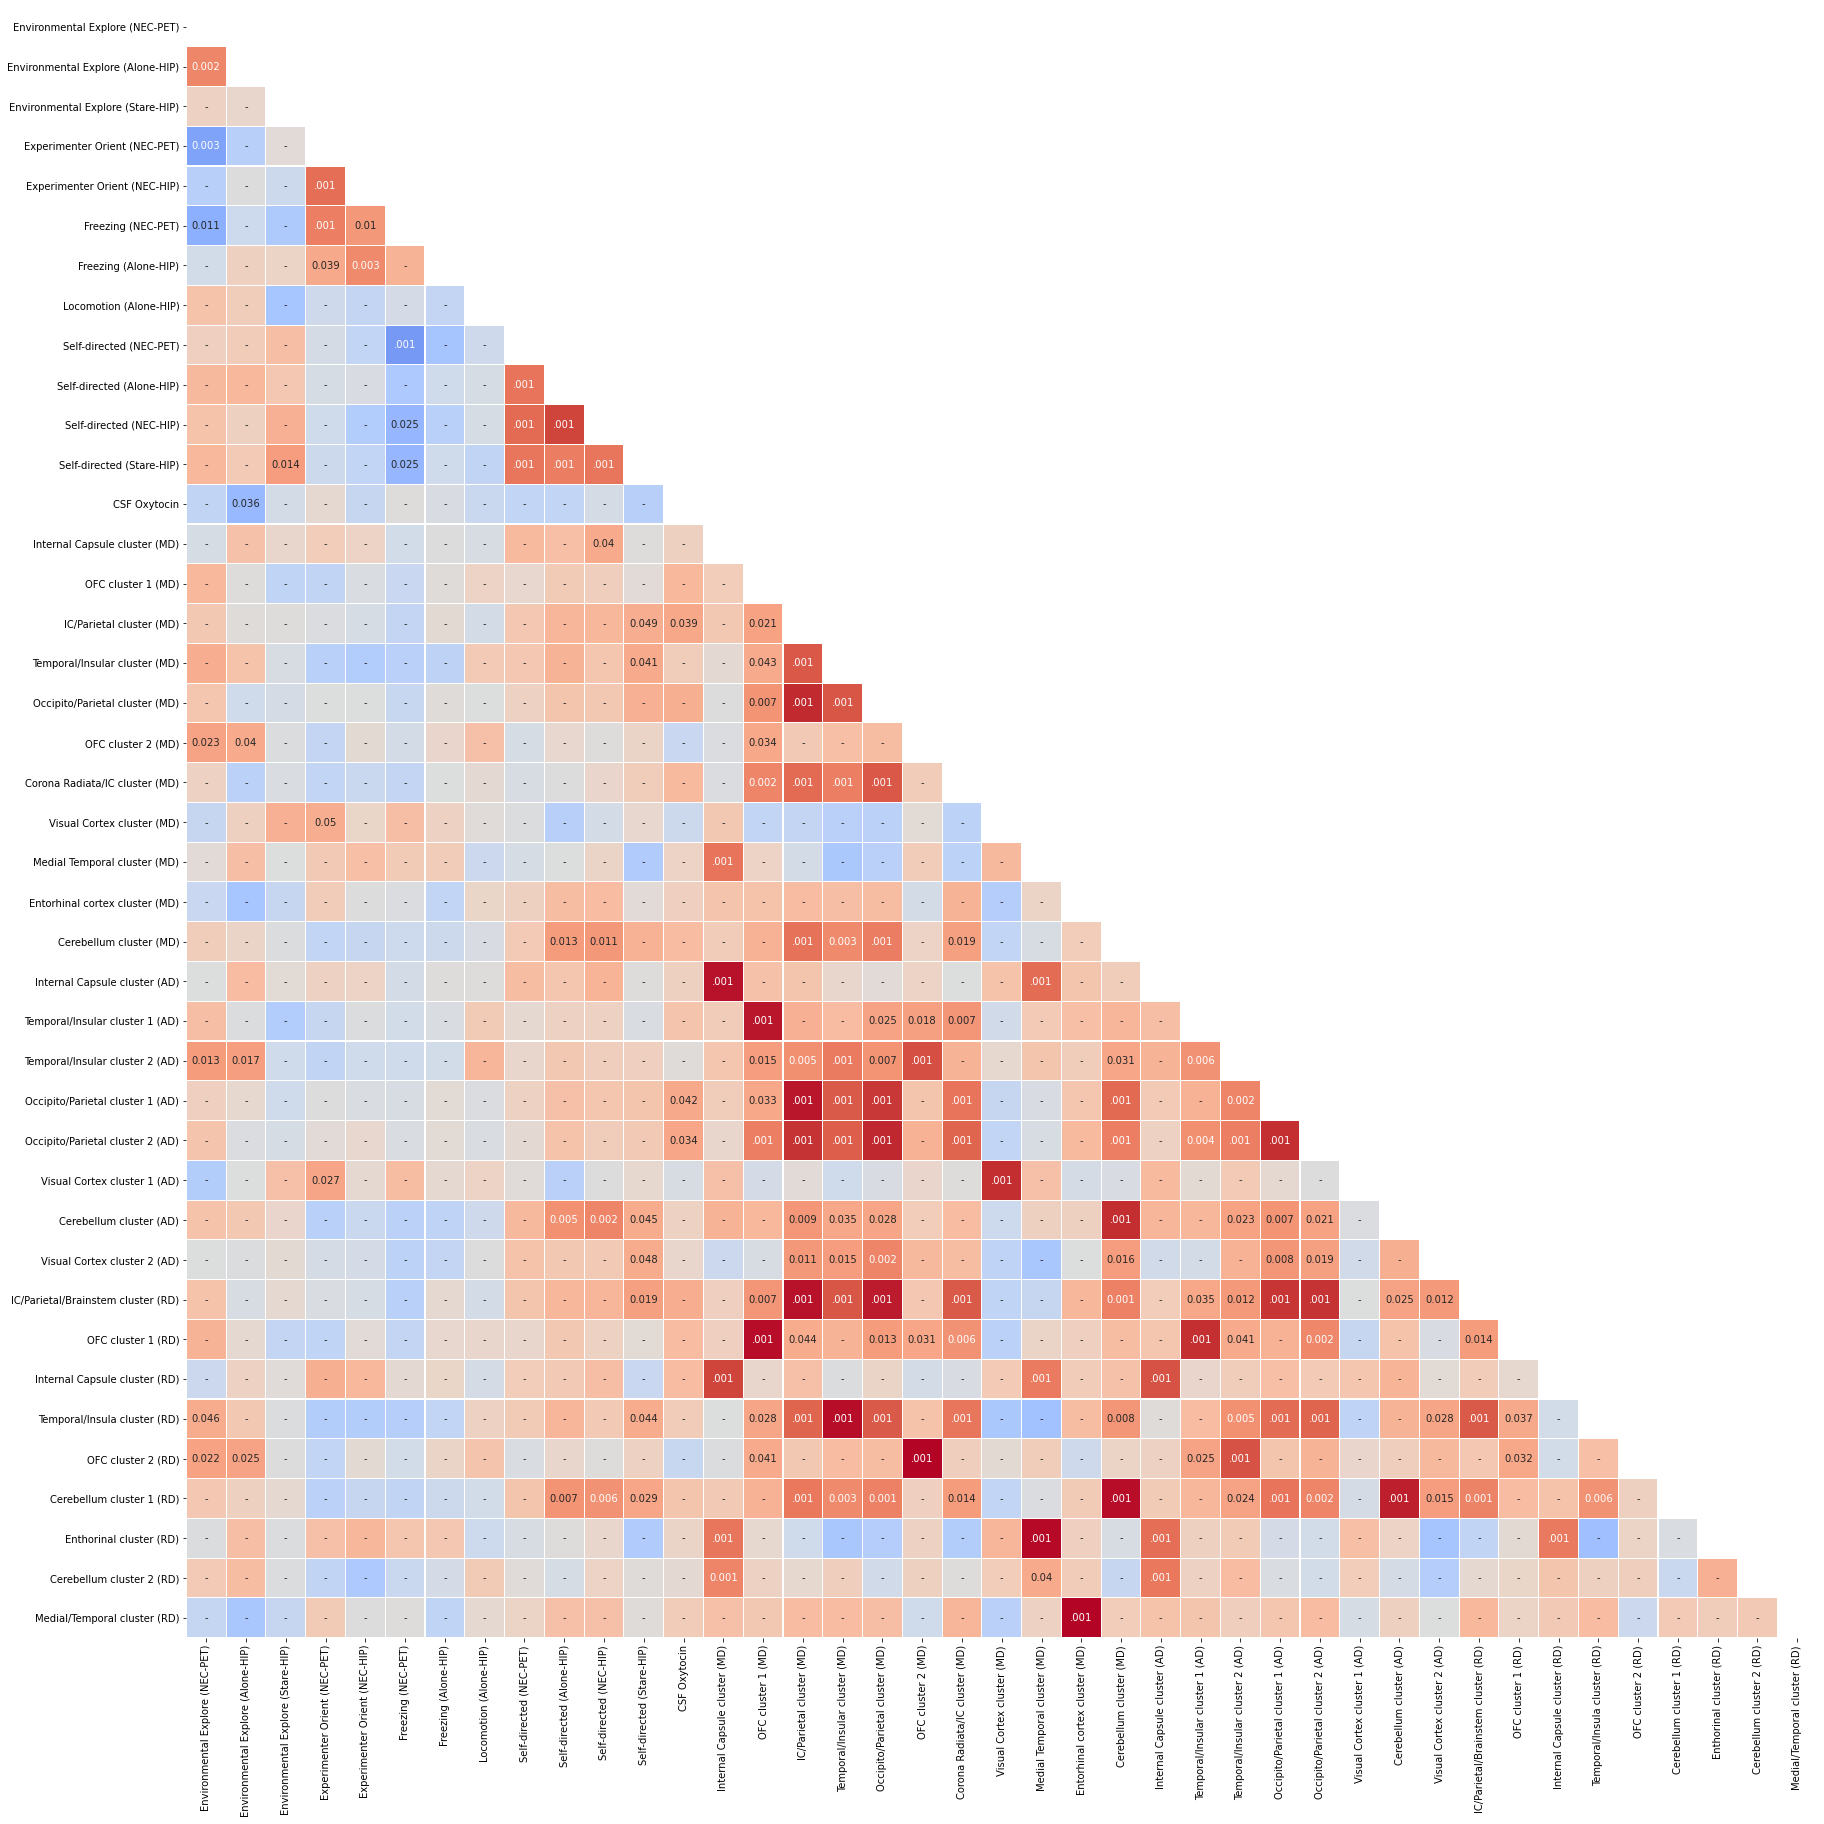

In [25]:
#Everything significant correlations p-values
#Within groups
#Latest newest last run
#In supplement
data=NR

selected_nomom = data[[#'Dam_s_Age_yrs_at_Subject_s_DOB', 
#'X_Days_Single_Birth_to_PET_final','Days_with_mom_in_pair_Birth_to_PET','X_Days_Group_without_mom_Birth_to_PET_final','Year_1_pair','Year_2_pair','Total_Unique_Cagemates_Birth_to_PET_final',
#BEHAVIOR
'EN_NECall_pet_trans','EN_Aall_hip_trans','EN_STall_hip_trans',
'EO_NECall_pet_trans','EO_NECall_hip_trans',
'FF_NECall_pet_trans','FF_Aall_hip_trans', 
'LO_Aall_hip_trans',
'SD_NECall_pet_trans','SD_Aall_hip_trans','SD_NECall_hip_trans','SD_STall_hip_trans',
#HORMONES
#'Oxy_CSF_Rep1_resid',
#'Oxy_CSF_Rep2_resid',
'Oxy_CSF_Mean_reps_resid',
#'Oxy_CSF_Mean_reps_resid_CV',
#'Oxy_CSF_Mean_reps_cv30_resid',
#Brain
#'jacPos_1_dlpfc', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacNeg_1_temporal', 'jacNeg_2_area10', 'jacNeg_3_ofc',
#'IC_av_ad',
'DTI_MD_11_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_9_neg_MD', 'DTI_MD_8_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_6_neg_MD', 'DTI_MD_5_neg_MD', 'DTI_MD_4_neg_MD', 'DTI_MD_3_neg_MD', 'DTI_MD_2_neg_MD', 'DTI_MD_1_neg_MD', 
'DTI_AD_8_neg_AD', 'DTI_AD_7_neg_AD', 'DTI_AD_6_neg_AD', 'DTI_AD_5_neg_AD', 'DTI_AD_4_neg_AD', 'DTI_AD_3_neg_AD', 'DTI_AD_2_neg_AD','DTI_AD_1_neg_AD',
'DTI_RD_9_neg_RD', 'DTI_RD_8_neg_RD', 'DTI_RD_7_neg_RD', 'DTI_RD_6_neg_RD', 'DTI_RD_5_neg_RD', 'DTI_RD_4_neg_RD', 'DTI_RD_3_neg_RD', 'DTI_RD_2_neg_RD','DTI_RD_1_neg_RD',
#'rs_fMRI_bilateral_1_neg_bilateral', 'rs_fMRI_bilateral_1_pos_bilateral', 'rs_fMRI_bilateral_2_neg_bilateral', 'rs_fMRI_bilateral_2_pos_bilateral', 'rs_fMRI_bilateral_3_neg_bilateral', 'rs_fMRI_bilateral_4_neg_bilateral', 'rs_fMRI_bilateral_5_neg_bilateral', 'rs_fMRI_bilateral_6_neg_bilateral', 'rs_fMRI_bilateral_7_neg_bilateral',
#'rs_fMRI_postCing_1_neg_postCing', 'rs_fMRI_postCing_1_pos_postCing', 'rs_fMRI_postCing_2_neg_postCing', 'rs_fMRI_postCing_2_pos_postCing', 'rs_fMRI_postCing_3_neg_postCing', 'rs_fMRI_postCing_4_neg_postCing', 'rs_fMRI_postCing_5_neg_postCing', 'rs_fMRI_postCing_6_neg_postCing', 'rs_fMRI_postCing_7_neg_postCing', 'rs_fMRI_postCing_8_neg_postCing',
#'petPos_1_nearInsula', 'petPos_2_insula', 'petNeg_1_parietal'
]]


#P-value function
def pearsonr_pval(x,y):
    p = pearsonr(x,y)[1]
#     if p > .05:
#         p = np.nan
    return p

#Make correlation matrix
heat = plt.figure(figsize=(30, 30))
# corr = selected_nomom.corr()
corr_p = selected_nomom.corr(method=pearsonr_pval)
corr = selected_nomom.corr(method='pearson')
#Rename rows and columns PET
rename_cols_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Age Mom', 
'X_Days_Single_Birth_to_PET_final':'Time alone',
'Days_with_mom_in_pair_Birth_to_PET':'Time with mom in pair',
'Days_with_mom_in_group_Birth_to_PET':'Time with mom in group',
'X_Days_Group_without_mom_Birth_to_PET_final':'Time without mom in group',
'Year_1_pair':'Time with peer in pair (days 0-365)',
'Year_2_pair':'Time with peer in pair (days 366-testing)',
'Total_Unique_Cagemates_Birth_to_PET_final':'Number of unique cagemates',
'Total_X_Room_Changes_Birth_to_PET_final':'Number of room changes',
'EN_NECall_pet_trans':'Environmental Explore (NEC-PET)','EO_NECall_pet_trans':'Experimenter Orient (NEC-PET)',
'FF_NECall_pet_trans':'Freezing (NEC-PET)','SD_NECall_pet_trans':'Self-directed (NEC-PET)',
'EN_Aall_hip_trans':'Environmental Explore (Alone-HIP)','FF_Aall_hip_trans':'Freezing (Alone-HIP)',
'LO_Aall_hip_trans':'Locomotion (Alone-HIP)','SD_Aall_hip_trans':'Self-directed (Alone-HIP)',
'EO_NECall_hip_trans':'Experimenter Orient (NEC-HIP)','SD_NECall_hip_trans':'Self-directed (NEC-HIP)',
'EN_STall_hip_trans':'Environmental Explore (Stare-HIP)','SD_STall_hip_trans':'Self-directed (Stare-HIP)',
'Oxy_CSF_Mean_reps_resid':'CSF Oxytocin',
'jacPos_2_amygWhiteL':'Amygdala Volume (L)', 'jacPos_3_amygWhiteR':'Amygdala Volume (R)',
'IC_av_ad':'Internal Capsule (AD)', 
#Fixed naming repetitions
'DTI_MD_11_neg_MD':'IC/Parietal/Brainstem cluster (MD)', 'DTI_MD_10_neg_MD':'OFC cluster 1 (MD)', 'DTI_MD_9_neg_MD':'IC/Parietal cluster (MD)', 'DTI_MD_8_neg_MD':'Temporal/Insular cluster (MD)', 'DTI_MD_7_neg_MD':'Occipito/Parietal cluster (MD)', 'DTI_MD_6_neg_MD':'OFC cluster 2 (MD)', 'DTI_MD_5_neg_MD':'Corona Radiata/IC cluster (MD)', 'DTI_MD_4_neg_MD':'Visual Cortex cluster (MD)', 'DTI_MD_3_neg_MD':'Medial Temporal cluster (MD)', 'DTI_MD_2_neg_MD':'Entorhinal cortex cluster (MD)', 'DTI_MD_1_neg_MD':'Cerebellum cluster (MD)',
'DTI_AD_8_neg_AD':'IC/Parietal/Brainstem cluster (AD)', 'DTI_AD_7_neg_AD':'Temporal/Insular cluster 1 (AD)', 'DTI_AD_6_neg_AD':'Temporal/Insular cluster 2 (AD)', 'DTI_AD_5_neg_AD':'Occipito/Parietal cluster 1 (AD)', 'DTI_AD_4_neg_AD':'Occipito/Parietal cluster 2 (AD)', 'DTI_AD_3_neg_AD':'Visual Cortex cluster 1 (AD)', 'DTI_AD_2_neg_AD':'Cerebellum cluster (AD)', 'DTI_AD_1_neg_AD':'Visual Cortex cluster 2 (AD)',
'DTI_RD_9_neg_RD':'IC/Parietal/Brainstem cluster (RD)', 'DTI_RD_8_neg_RD':'OFC cluster 1 (RD)', 'DTI_RD_7_neg_RD':'Brainstem cluster (RD)', 'DTI_RD_6_neg_RD':'Temporal/Insula cluster (RD)', 'DTI_RD_5_neg_RD':'OFC cluster 2 (RD)', 'DTI_RD_4_neg_RD':'Cerebellum cluster 1 (RD)', 'DTI_RD_3_neg_RD':'Enthorinal cluster (RD)', 'DTI_RD_2_neg_RD':'Cerebellum cluster 2 (RD)', 'DTI_RD_1_neg_RD':'Medial/Temporal cluster (RD)',
'DTI_AD_8_neg_AD':'Internal Capsule cluster (AD)','DTI_MD_11_neg_MD':'Internal Capsule cluster (MD)','DTI_RD_7_neg_RD':'Internal Capsule cluster (RD)', 
'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus','rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate',
'petPos_2_insula':'Insula PET metabolism'
                   }

rename_index_dict = {'Dam_s_Age_yrs_at_Subject_s_DOB':'Age Mom', 
'X_Days_Single_Birth_to_PET_final':'Time alone',
'Days_with_mom_in_pair_Birth_to_PET':'Time with mom in pair',
'Days_with_mom_in_group_Birth_to_PET':'Time with mom in group',
'X_Days_Group_without_mom_Birth_to_PET_final':'Time without mom in group',
'Year_1_pair':'Time with peer in pair (days 0-365)',
'Year_2_pair':'Time with peer in pair (days 366-testing)',
'Total_Unique_Cagemates_Birth_to_PET_final':'Number of unique cagemates',
'Total_X_Room_Changes_Birth_to_PET_final':'Number of room changes',
'EN_NECall_pet_trans':'Environmental Explore (NEC-PET)','EO_NECall_pet_trans':'Experimenter Orient (NEC-PET)',
'FF_NECall_pet_trans':'Freezing (NEC-PET)','SD_NECall_pet_trans':'Self-directed (NEC-PET)',
'EN_Aall_hip_trans':'Environmental Explore (Alone-HIP)','FF_Aall_hip_trans':'Freezing (Alone-HIP)',
'LO_Aall_hip_trans':'Locomotion (Alone-HIP)','SD_Aall_hip_trans':'Self-directed (Alone-HIP)',
'EO_NECall_hip_trans':'Experimenter Orient (NEC-HIP)','SD_NECall_hip_trans':'Self-directed (NEC-HIP)',
'EN_STall_hip_trans':'Environmental Explore (Stare-HIP)','SD_STall_hip_trans':'Self-directed (Stare-HIP)',
'Oxy_CSF_Mean_reps_resid':'CSF Oxytocin',
'jacPos_2_amygWhiteL':'Amygdala Volume (L)', 'jacPos_3_amygWhiteR':'Amygdala Volume (R)',
'IC_av_ad':'Internal Capsule (AD)', 
#Fixed naming repetitions
'DTI_MD_11_neg_MD':'IC/Parietal/Brainstem cluster (MD)', 'DTI_MD_10_neg_MD':'OFC cluster 1 (MD)', 'DTI_MD_9_neg_MD':'IC/Parietal cluster (MD)', 'DTI_MD_8_neg_MD':'Temporal/Insular cluster (MD)', 'DTI_MD_7_neg_MD':'Occipito/Parietal cluster (MD)', 'DTI_MD_6_neg_MD':'OFC cluster 2 (MD)', 'DTI_MD_5_neg_MD':'Corona Radiata/IC cluster (MD)', 'DTI_MD_4_neg_MD':'Visual Cortex cluster (MD)', 'DTI_MD_3_neg_MD':'Medial Temporal cluster (MD)', 'DTI_MD_2_neg_MD':'Entorhinal cortex cluster (MD)', 'DTI_MD_1_neg_MD':'Cerebellum cluster (MD)',
'DTI_AD_8_neg_AD':'IC/Parietal/Brainstem cluster (AD)', 'DTI_AD_7_neg_AD':'Temporal/Insular cluster 1 (AD)', 'DTI_AD_6_neg_AD':'Temporal/Insular cluster 2 (AD)', 'DTI_AD_5_neg_AD':'Occipito/Parietal cluster 1 (AD)', 'DTI_AD_4_neg_AD':'Occipito/Parietal cluster 2 (AD)', 'DTI_AD_3_neg_AD':'Visual Cortex cluster 1 (AD)', 'DTI_AD_2_neg_AD':'Cerebellum cluster (AD)', 'DTI_AD_1_neg_AD':'Visual Cortex cluster 2 (AD)',
'DTI_RD_9_neg_RD':'IC/Parietal/Brainstem cluster (RD)', 'DTI_RD_8_neg_RD':'OFC cluster 1 (RD)', 'DTI_RD_7_neg_RD':'Brainstem cluster (RD)', 'DTI_RD_6_neg_RD':'Temporal/Insula cluster (RD)', 'DTI_RD_5_neg_RD':'OFC cluster 2 (RD)', 'DTI_RD_4_neg_RD':'Cerebellum cluster 1 (RD)', 'DTI_RD_3_neg_RD':'Enthorinal cluster (RD)', 'DTI_RD_2_neg_RD':'Cerebellum cluster 2 (RD)', 'DTI_RD_1_neg_RD':'Medial/Temporal cluster (RD)',
'DTI_AD_8_neg_AD':'Internal Capsule cluster (AD)','DTI_MD_11_neg_MD':'Internal Capsule cluster (MD)','DTI_RD_7_neg_RD':'Internal Capsule cluster (RD)', 
'rs_fMRI_postCing_8_neg_postCing':'Cingulate to Hippocampus','rs_fMRI_bilateral_7_neg_bilateral':'Amygdala to Cingulate',
'petPos_2_insula':'Insula PET metabolism'
                    }
corr_rename_nr = corr.rename(index=rename_index_dict, columns=rename_cols_dict)
corr_rename_nr_p = corr_p.rename(index=rename_index_dict, columns=rename_cols_dict)

ax = plt.subplot(1, 1, 1)
#sns.set_context("poster")
mask = np.zeros_like(corr_rename_nr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

x_list = []
for x in corr_rename_nr_p.values.flatten():
    if x > .05:
        x_str='-'
    elif x<.001: 
        x_str='.001'
    else: 
        x_str = str(np.round(x,3))
        
    x_list.append( x_str )
corr_rename_nr_label = np.array(x_list).reshape(corr_rename_nr.shape)
    
# sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr_rename_nr, mask=mask, cmap=sns.color_palette("coolwarm", as_cmap=True),
            square=True, ax=ax, annot=corr_rename_nr_label, vmin=-1, vmax=1, fmt="", robust=True, cbar=False, linewidths=.1)

heat.savefig('../FIGS/NOMOM_corr_matrix_everything_NR_p-values_05_large.pdf', dpi=300, bbox_inches='tight', transparent=True)



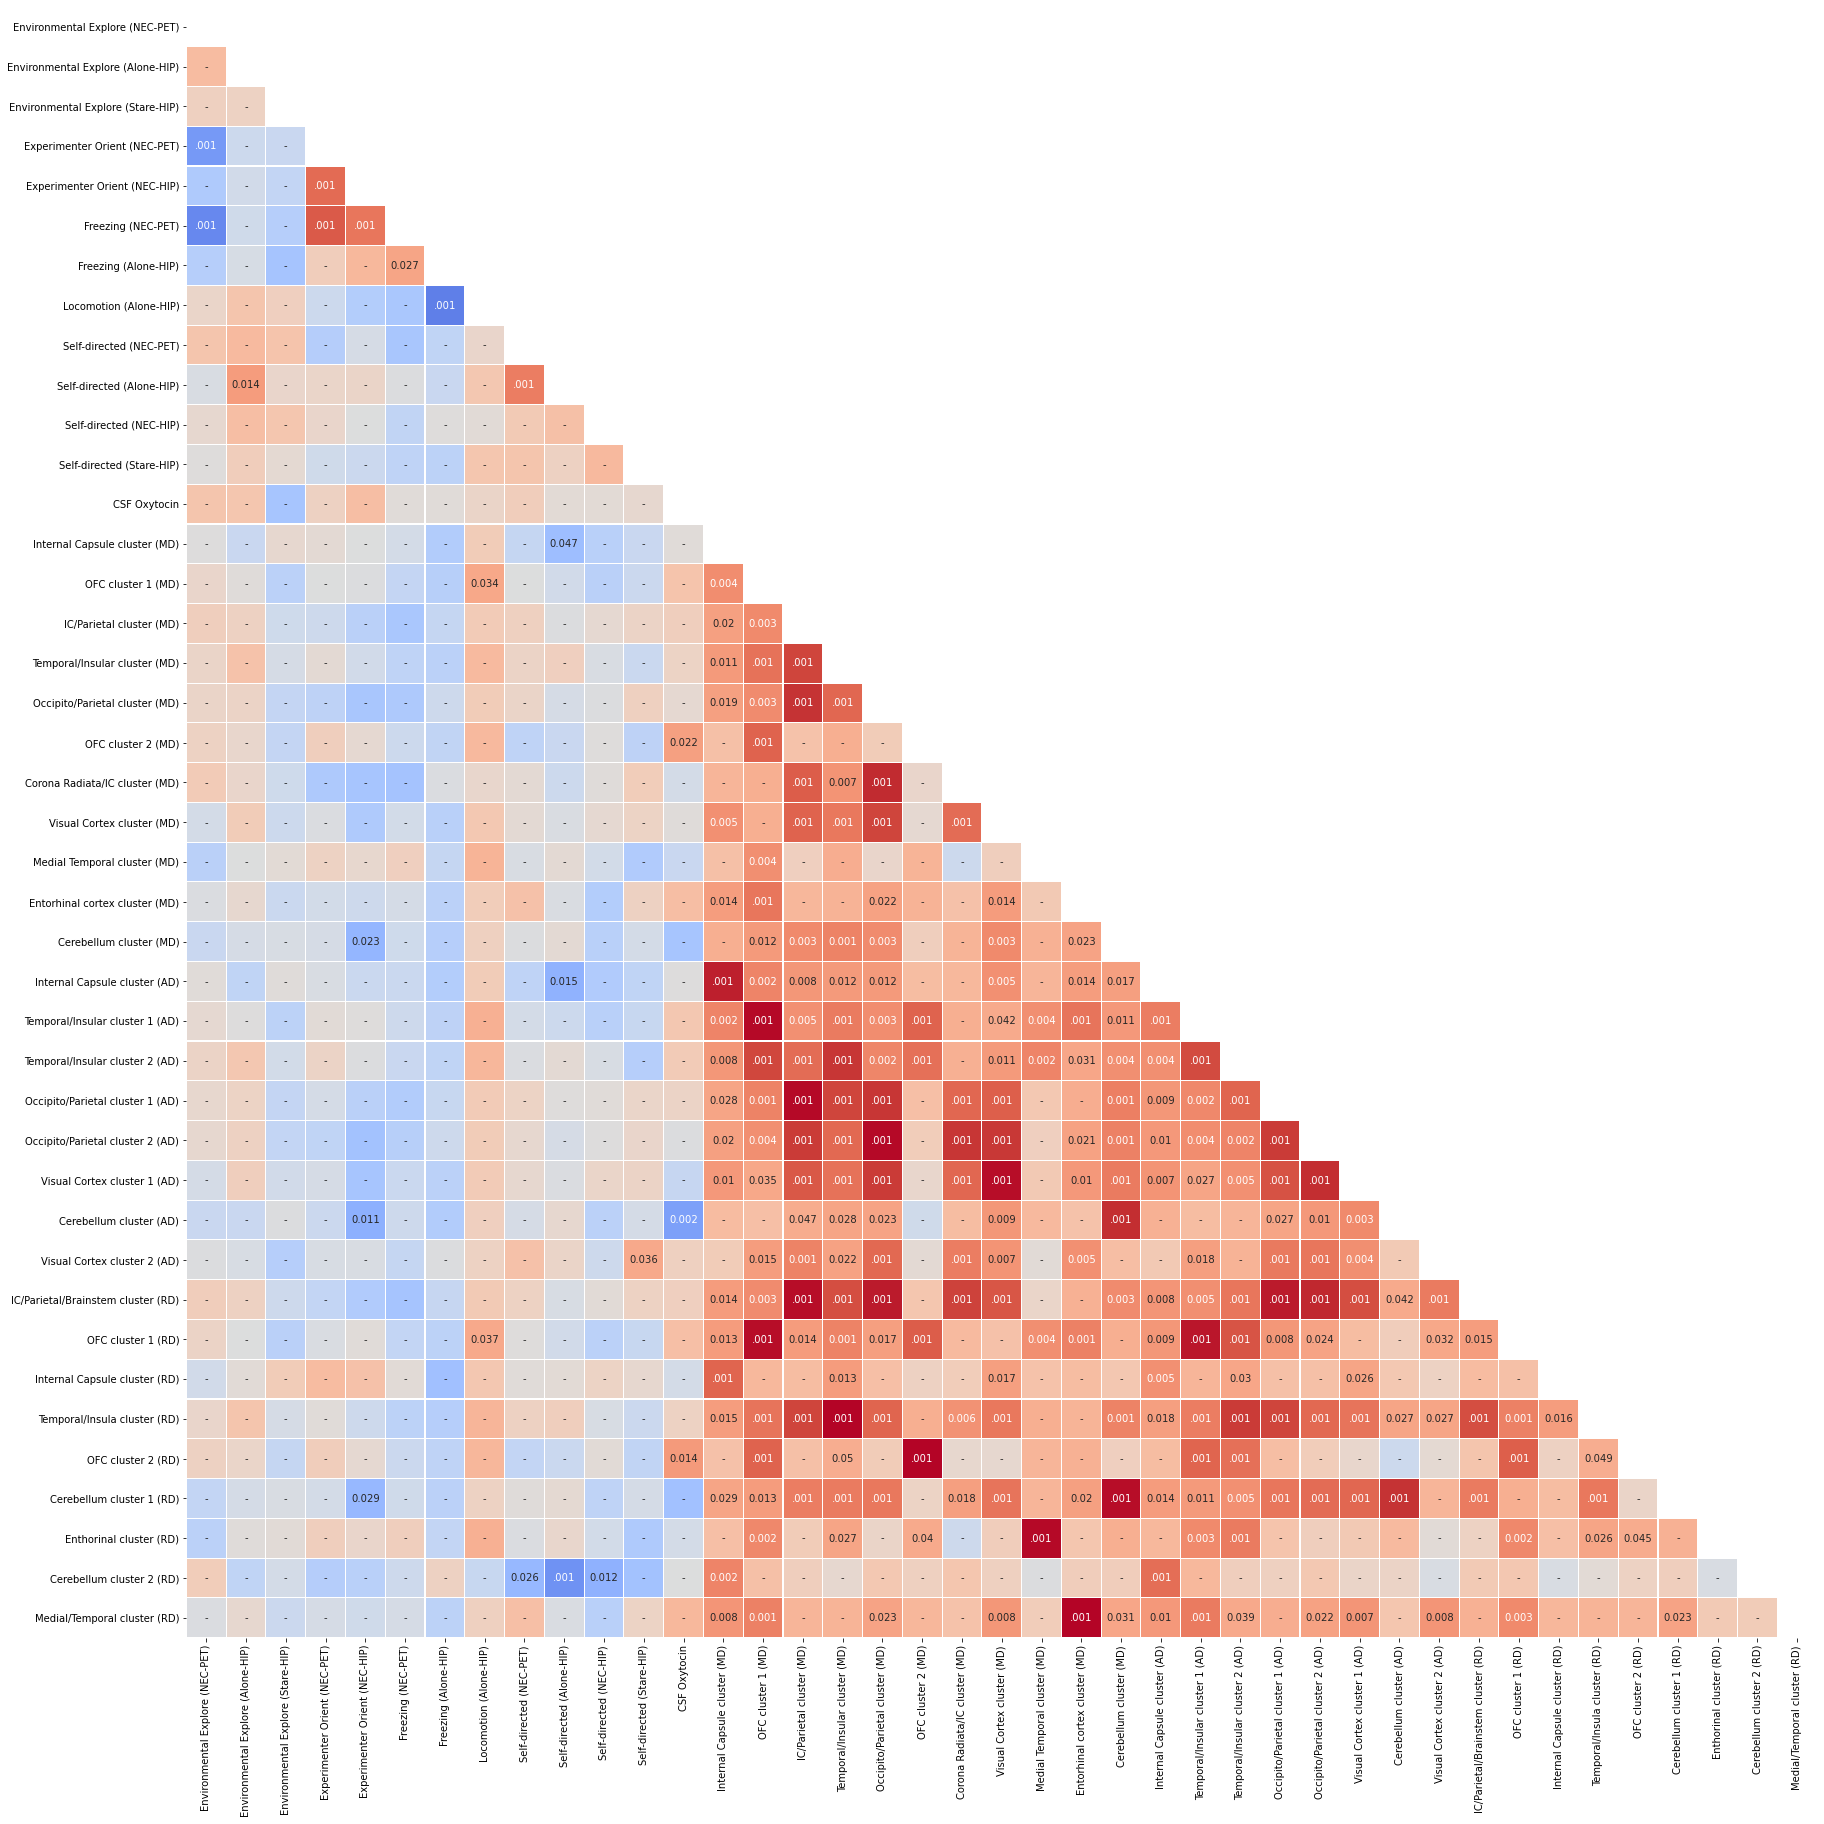

In [26]:
#Everything significant correlations
#Within groups
#Latest newest last run
#In supplement
data=Con

selected_nomom = data[[#'Dam_s_Age_yrs_at_Subject_s_DOB', 
#'X_Days_Single_Birth_to_PET_final','Days_with_mom_in_pair_Birth_to_PET','X_Days_Group_without_mom_Birth_to_PET_final','Year_1_pair','Year_2_pair','Total_Unique_Cagemates_Birth_to_PET_final',
#BEHAVIOR
'EN_NECall_pet_trans','EN_Aall_hip_trans','EN_STall_hip_trans',
'EO_NECall_pet_trans','EO_NECall_hip_trans',
'FF_NECall_pet_trans','FF_Aall_hip_trans',
'LO_Aall_hip_trans',
'SD_NECall_pet_trans','SD_Aall_hip_trans','SD_NECall_hip_trans','SD_STall_hip_trans',
#HORMONES
#'Oxy_CSF_Rep1_resid',
#'Oxy_CSF_Rep2_resid',
'Oxy_CSF_Mean_reps_resid',
#'Oxy_CSF_Mean_reps_resid_CV',
#'Oxy_CSF_Mean_reps_cv30_resid',
#Brain
#'jacPos_1_dlpfc', 'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR', 'jacNeg_1_temporal', 'jacNeg_2_area10', 'jacNeg_3_ofc',
#'IC_av_ad',
'DTI_MD_11_neg_MD', 'DTI_MD_10_neg_MD', 'DTI_MD_9_neg_MD', 'DTI_MD_8_neg_MD', 'DTI_MD_7_neg_MD', 'DTI_MD_6_neg_MD', 'DTI_MD_5_neg_MD', 'DTI_MD_4_neg_MD', 'DTI_MD_3_neg_MD', 'DTI_MD_2_neg_MD', 'DTI_MD_1_neg_MD', 
'DTI_AD_8_neg_AD', 'DTI_AD_7_neg_AD', 'DTI_AD_6_neg_AD', 'DTI_AD_5_neg_AD', 'DTI_AD_4_neg_AD', 'DTI_AD_3_neg_AD', 'DTI_AD_2_neg_AD','DTI_AD_1_neg_AD',
'DTI_RD_9_neg_RD', 'DTI_RD_8_neg_RD', 'DTI_RD_7_neg_RD', 'DTI_RD_6_neg_RD', 'DTI_RD_5_neg_RD', 'DTI_RD_4_neg_RD', 'DTI_RD_3_neg_RD', 'DTI_RD_2_neg_RD','DTI_RD_1_neg_RD',
#'rs_fMRI_bilateral_1_neg_bilateral', 'rs_fMRI_bilateral_1_pos_bilateral', 'rs_fMRI_bilateral_2_neg_bilateral', 'rs_fMRI_bilateral_2_pos_bilateral', 'rs_fMRI_bilateral_3_neg_bilateral', 'rs_fMRI_bilateral_4_neg_bilateral', 'rs_fMRI_bilateral_5_neg_bilateral', 'rs_fMRI_bilateral_6_neg_bilateral', 'rs_fMRI_bilateral_7_neg_bilateral',
#'rs_fMRI_postCing_1_neg_postCing', 'rs_fMRI_postCing_1_pos_postCing', 'rs_fMRI_postCing_2_neg_postCing', 'rs_fMRI_postCing_2_pos_postCing', 'rs_fMRI_postCing_3_neg_postCing', 'rs_fMRI_postCing_4_neg_postCing', 'rs_fMRI_postCing_5_neg_postCing', 'rs_fMRI_postCing_6_neg_postCing', 'rs_fMRI_postCing_7_neg_postCing', 'rs_fMRI_postCing_8_neg_postCing',
#'petPos_1_nearInsula', 'petPos_2_insula', 'petNeg_1_parietal'
]]

#P-value function
def pearsonr_pval(x,y):
    p = pearsonr(x,y)[1]
#     if p > .05:
#         p = np.nan
    return p

#Make correlation matrix
heat = plt.figure(figsize=(30, 30))
# corr = selected_nomom.corr()
corr_p = selected_nomom.corr(method=pearsonr_pval)
corr = selected_nomom.corr(method='pearson')

# #Rename rows and columns PET
#Reuse rename_cols_dict from previous cell

corr_rename_con = corr.rename(index=rename_index_dict, columns=rename_cols_dict)
corr_rename_con_p = corr_p.rename(index=rename_index_dict, columns=rename_cols_dict)

ax = plt.subplot(1, 1, 1)
#sns.set_context("paper")
mask = np.zeros_like(corr_rename_con, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

x_list = []
for x in corr_rename_con_p.values.flatten():
    if x > .05:
        x_str='-'
    elif x<.001: 
        x_str='.001'
    else: 
        x_str = str(np.round(x,3))

    x_list.append( x_str )
corr_rename_con_label = np.array(x_list).reshape(corr_rename_con.shape)

# sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr_rename_con, mask=mask, cmap=sns.color_palette("coolwarm", as_cmap=True),
            square=True, ax=ax, annot=corr_rename_con_label, vmin=-1, vmax=1, fmt="", robust=True, cbar=False, linewidths=.1)

heat.savefig('../FIGS/NOMOM_corr_matrix_everything_Con_p-values_05_large.pdf', dpi=300, bbox_inches='tight', transparent=True)

#print(corr)

In [27]:
# # corr_rename_nr.iloc[0,1]
# print( np.arctanh(corr_rename_nr.iloc[0,1]), corr_rename_nr_z.iloc[0,1] )

# np.arctanh(1)

# print(corr_rename_nr_z.shape[0])

In [28]:
#Run this to run Differrence matrix
#Convert r to z using numpy arctanh function:
corr_rename_nr_z=np.arctanh(corr_rename_nr)
corr_rename_con_z=np.arctanh(corr_rename_con)

corr_rename_nr_z.to_csv('NOMOM_corr_matrix_nr_z.csv')
corr_rename_con_z.to_csv('NOMOM_corr_matrix_con_z.csv')

<ipython-input-28-4a2219d6b99a>:3: RuntimeWarning: divide by zero encountered in arctanh
  corr_rename_nr_z=np.arctanh(corr_rename_nr)
<ipython-input-28-4a2219d6b99a>:4: RuntimeWarning: divide by zero encountered in arctanh
  corr_rename_con_z=np.arctanh(corr_rename_con)


In [29]:
# #Try to draw histograms - doesnt work due to NA
# # UNC_L = bign_merge.UNC_L_fa_resid
# # UNC_R = bign_merge.UNC_R_fa_resid
# #plt.hist(UNC_L, 300, label="UNC L", normed=1, facecolor='r', alpha=0.2)

# bins=100
# # for var in ['UNC_R','UNC_L']:
# #     pyplot.subplots()
# #     pyplot.hist(var, bins=bins, alpha=0.5, label=var)
# #     pyplot.legend(loc='upper right')
# from matplotlib import pyplot
# #bins = numpy.linspace(0, 0.4, 50)
# pyplot.hist(corr_rename_con_z, bins, alpha=0.5, label='Control')
# pyplot.hist(corr_rename_nr_z, bins, alpha=0.5, label='MR')
# pyplot.legend(loc='upper right')
# pyplot.show()

In [30]:
#Run this to run difference matrix
# function to run z-test on z-scores. 
def z_test( z1, z2, n1, n2 ):
    return (z1-z2) / np.sqrt((1/(n1-3)) + (1/(n2-3))) 

# set N
n1 = 25
n2 = 25

# create array of zeros, where we will fill in z-scores
my_z_array = np.zeros(corr_rename_nr_z.shape)

# compute z-difference
for i in range(0, corr_rename_nr_z.shape[0]):
    for j in range(0,i):
        z1 = corr_rename_nr_z.iloc[i,j] 
        z2 = corr_rename_con_z.iloc[i,j] 
        my_z_array[i,j] = z_test( z1, z2, n1, n2 )
        

# create z dataframe
corr_diff = pd.DataFrame(my_z_array, columns=corr_rename_nr_z.columns, index=corr_rename_nr_z.columns)

# create p-array and p-dataframe
my_p_aray = norm.sf(abs(my_z_array))*2
corr_diff_p = pd.DataFrame(my_p_aray, columns=corr_rename_nr_z.columns, index=corr_rename_nr_z.columns)

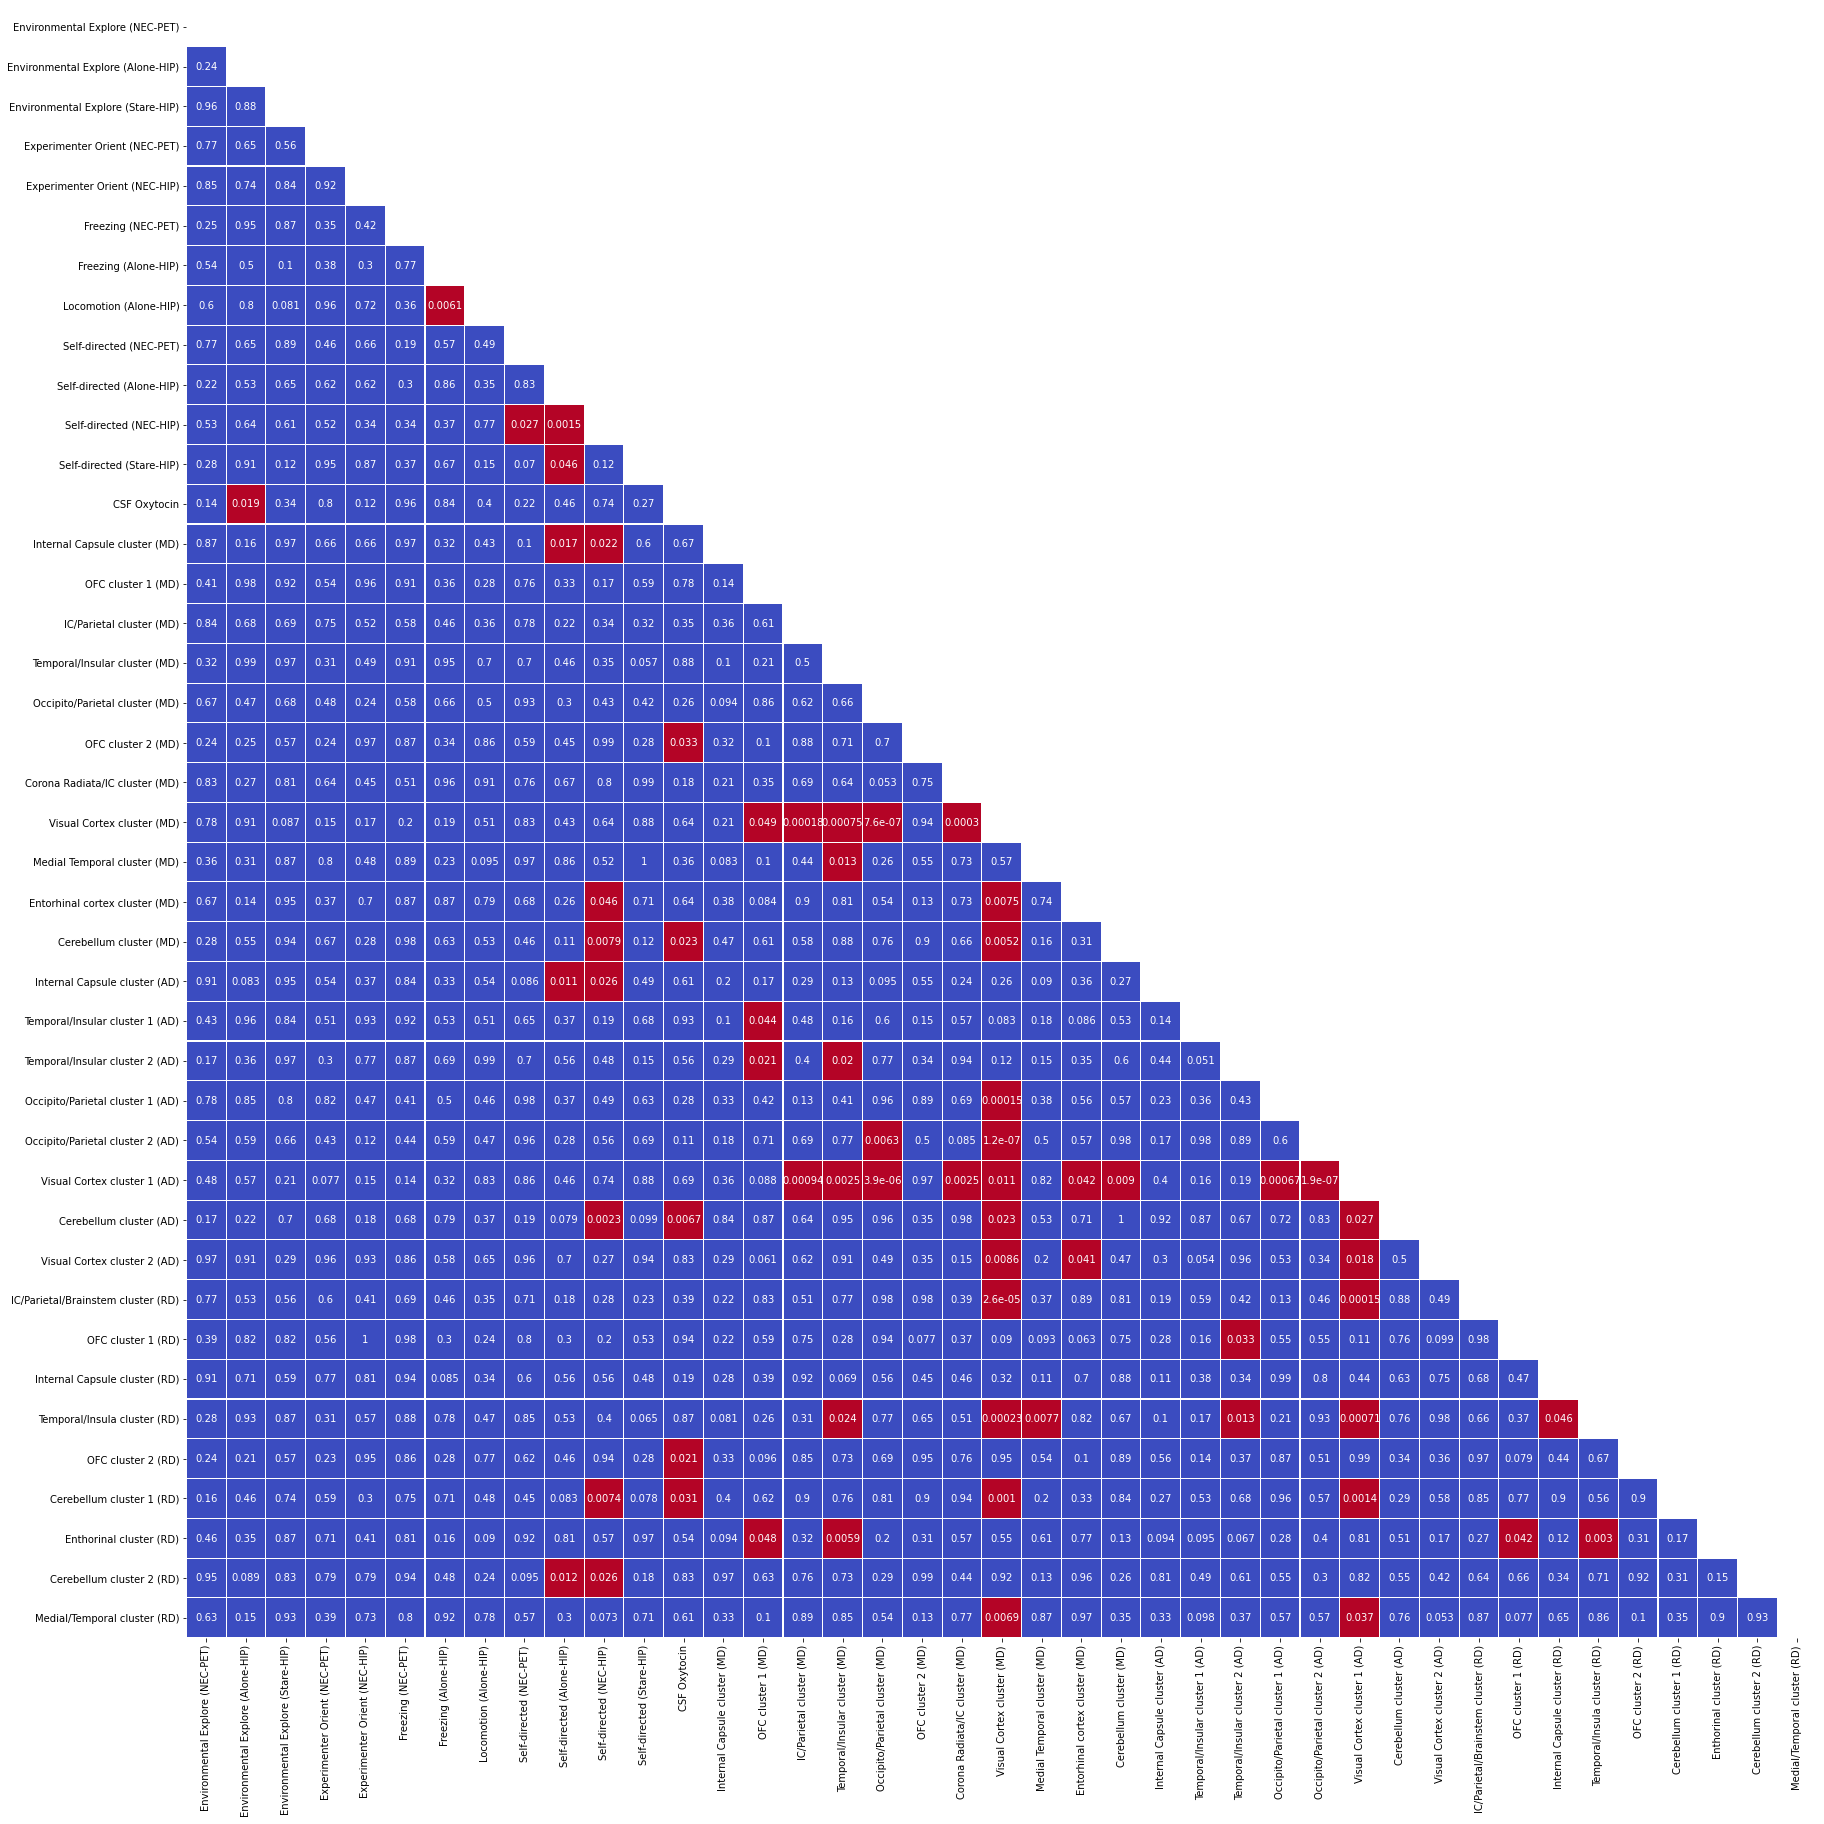

In [31]:
#Everything difference correlations 
#In supplement
#Between groups
#Latest newest last run
#with p-values
heat = plt.figure(figsize=(30, 30))
ax = plt.subplot(1, 1, 1)
#sns.set_context("paper")
mask = np.zeros_like(corr_rename_con, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_diff_p<.05, mask=mask, cmap=sns.color_palette("coolwarm", as_cmap=True),
            square=True, ax=ax, annot=corr_diff_p, robust=True, cbar=False, linewidths=.1)

heat.savefig('../FIGS/NOMOM_corr_matrix_difference_large_pvalues.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [32]:
# #Graph resuls
# #Plot sign correlations
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
# sns.color_palette("Blues")
# #sns.set_context("poster")

# # # 'X_Days_Single_Birth_to_PET_final','Days_with_mom_in_pair_Birth_to_PET','X_Days_Group_without_mom_Birth_to_PET_final','Year_1_pair','Year_2_pair','Total_Unique_Cagemates_Birth_to_PET_final',
# # #'EN_NECall_pet_trans','EN_Aall_hip_trans','EN_STall_hip_trans',
# # #'EO_NECall_pet_trans','EO_NECall_hip_trans',
# # #'FF_NECall_pet_trans',
# #     'FF_Aall_hip_trans',
# # 'SD_NECall_pet_trans','SD_Aall_hip_trans',#'SD_NECall_hip_trans','SD_STall_hip_trans',
# # #'LO_Aall_hip_trans',
# # #'O_CSF_res',
# # #'jacPos_2_amygWhiteL', 'jacPos_3_amygWhiteR',
# # #'IC_av_ad',
# #     'DTI_AD_8_neg_AD', 'DTI_MD_11_neg_MD','DTI_RD_7_neg_RD', 
# # #'rs_fMRI_postCing_8_neg_postCing','rs_fMRI_bilateral_7_neg_bilateral','petPos_2_insula'



# hue='Group'
# data=nomom
# y='SD_Aall_hip_trans'
# x='DTI_AD_8_neg_AD'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Self Directed (Alone HIP)")
# plt.xlabel("Internal Capsule Cluster (AD)")

# hue='Group'
# data=nomom
# y='SD_Aall_hip_trans'
# x='DTI_MD_11_neg_MD'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# plt.ylabel("Self Directed (Alone HIP)")
# plt.xlabel("Internal Capsule Cluster (MD)")


# y='X_Days_Group_without_mom_Birth_to_PET_final'
# x='DTI_MD_11_neg_MD'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.ylabel("# of days in group without mom")
# plt.xlabel("Internal Capsule Cluster (MD)")

# y='SD_Aall_hip_trans'
# x='DTI_RD_7_neg_RD'
# sns.lmplot(x=x, y=y, data=data, hue=hue, palette="Blues", legend="False")
# # sns.lmplot(x=x, y=y, data=data, palette="Blues", legend="False")
# plt.ylabel("Self Directed (Alone HIP)")
# plt.xlabel("Internal Capsule cluster (RD)")